In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('weekly_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6079 non-null   int64  
 1   Name          6079 non-null   object 
 2   Position      6079 non-null   object 
 3   Year          6079 non-null   int64  
 4   Week          6079 non-null   int64  
 5   Rank          6079 non-null   int64  
 6   Team          6079 non-null   object 
 7   Standard Pts  6079 non-null   float64
 8   Pass_Att      6079 non-null   int64  
 9   Pass_Cmp      6079 non-null   int64  
 10  Pass_Yds      6079 non-null   int64  
 11  Pass_TD       6079 non-null   int64  
 12  Int           6079 non-null   int64  
 13  Pass_2Pt      6079 non-null   int64  
 14  Rush_Att      6079 non-null   int64  
 15  Rush_Yds      6079 non-null   int64  
 16  Rush_TD       6079 non-null   int64  
 17  Rush_2Pt      6079 non-null   int64  
 18  Rec           6079 non-null 

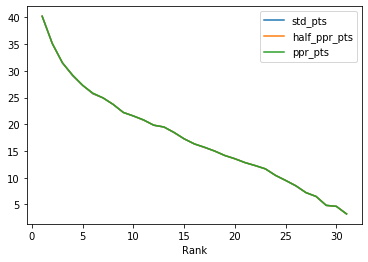

In [95]:
#QB 
df_qb = df[df['Position'] == 'QB']
df_qb_pts = df_qb.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_qb_pts = df_qb_pts.iloc[0:31]
df_qb_pts['Position'] = 'QB'
df_qb_pts.plot()

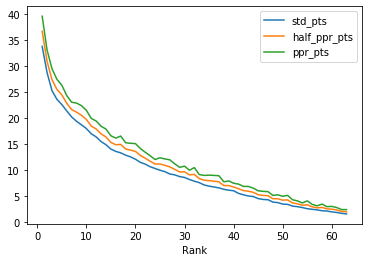

In [96]:
#RB 
df_rb = df[df['Position'] == 'RB']
df_rb_pts = df_rb.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_rb_pts = df_rb_pts.iloc[0:63]
df_rb_pts['Position'] = 'RB'
df_rb_pts.plot()

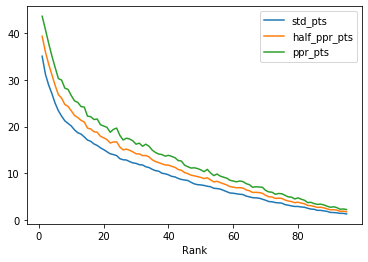

In [97]:
#WR
df_wr = df[df['Position'] == 'WR']
df_wr_pts = df_wr.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_wr_pts = df_wr_pts.iloc[0:95]
df_wr_pts['Position'] = 'WR'
df_wr_pts.plot()

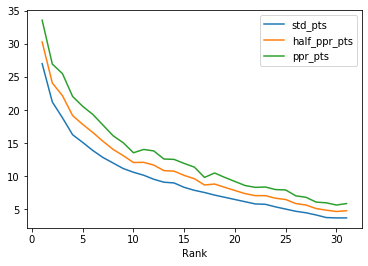

In [98]:
#TE
df_te = df[df['Position'] == 'TE']
df_te_pts = df_te.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_te_pts = df_te_pts.iloc[0:31]
df_te_pts['Position'] = 'TE'
df_te_pts.plot()

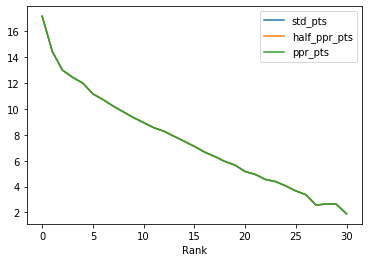

In [99]:
#K
df_k = df[df['Position'] == 'K']
df_k_pts = df_k.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_k_pts = df_k_pts.iloc[0:31]
df_k_pts['Position'] = 'K'
df_k_pts.plot()

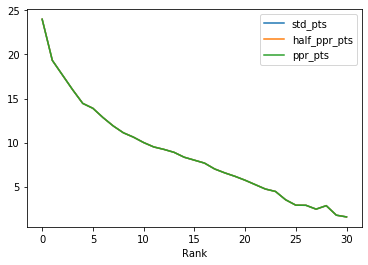

In [100]:
df_dst = df[df['Position'] == 'DST']
df_dst_pts = df_dst.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_dst_pts = df_dst_pts.iloc[0:31]
df_dst_pts['Position'] = 'DST'
df_dst_pts.plot()

In [101]:
df_cat = pd.concat([df_qb_pts, df_rb_pts, df_wr_pts, df_te_pts, df_k_pts, df_dst_pts])
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 1 to 30
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   std_pts       282 non-null    float64
 1   half_ppr_pts  282 non-null    float64
 2   ppr_pts       282 non-null    float64
 3   Position      282 non-null    object 
dtypes: float64(3), object(1)
memory usage: 11.0+ KB


In [102]:
df.to_csv('Rank Points Data.csv')

In [103]:
#df_corr has columns QB, RB, WR1, WR2, WR3, TE, K, DST point total for each week for each team
df_corr = df[['Name', 'Position', 'Year', 'Week', 'Team', 'Standard Pts', 'Half PPR Pts', 'PPR Pts']]

In [130]:
TEAMS = df['Team'].unique()
YEARS = [2022]
POSITIONS = ["QB", "RB", "WR", "TE", "K", "DST"]

In [122]:
df_yearly = pd.read_csv('yearly_data.csv')
df_yearly.head()

,Unnamed: 0,Name,Position,Year,Rank,Standard Pts,Pass_Att,Pass_Cmp,Pass_Yds,Pass_TD,...,DST_Int,DST_Saf,DST_FR,DST_Blk,DST_TD,DST_PA,DST_Pass_Yds,DST_Rush_Yds,DST_Tot_Yds,Team
0,0,Patrick Mahomes,QB,2022,1,482.0,648,435,5250,41,...,0,0,0,0,0,0,0.0,0.0,0.0,KC
1,1,Josh Allen,QB,2022,2,455.0,567,359,4283,35,...,0,0,0,0,0,0,0.0,0.0,0.0,BUF
2,2,Jalen Hurts,QB,2022,3,412.0,460,306,3701,22,...,0,0,0,0,0,0,0.0,0.0,0.0,PHI
3,3,Joe Burrow,QB,2022,4,411.0,606,414,4475,35,...,0,0,0,0,0,0,0.0,0.0,0.0,CIN
4,4,Geno Smith,QB,2022,5,352.0,572,399,4282,30,...,0,0,0,0,0,0,0.0,0.0,0.0,SEA


In [134]:
columns = ['Year', 'Team', 'QB1', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE']
df_roster = pd.DataFrame(columns=columns)
for year in YEARS:
    for team in TEAMS:
        line = [year,team]
        df_team = df_yearly[(df_yearly['Team']==team) & (df_yearly['Year']==year)]
        for pos in POSITIONS:
            if pos == 'QB':
                qb_one = df_team[df_team['Position'] == 'QB'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[0]
                line.append(qb_one)
            if pos == 'RB':
                rb_one = qb_one = df_team[df_team['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[0]
                rb_two = qb_one = df_team[df_team['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[1]
                line.append(rb_one)
                line.append(rb_two)
            if pos == 'WR':
                wr_one = qb_one = df_team[df_team['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[0]
                wr_two = qb_one = df_team[df_team['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[1]  
                wr_three = qb_one = df_team[df_team['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[2]
                line.append(wr_one)
                line.append(wr_two)
                line.append(wr_three)
            if pos == 'TE':
                te_one = qb_one = df_team[df_team['Position'] == 'TE'].sort_values(by=['PPR Pts'], ascending = False)['Name'].iloc[0]
                line.append(te_one)
        df_roster.loc[len(df_roster)] = line     
df_roster

,Year,Team,QB1,RB1,RB2,WR1,WR2,WR3,TE
0,2022,KC,Patrick Mahomes,Jerick McKinnon,Isiah Pacheco,JuJu Smith-Schuster,Marquez Valdes-Scantling,Mecole Hardman,Travis Kelce
1,2022,BUF,Josh Allen,Devin Singletary,James Cook,Stefon Diggs,Gabriel Davis,Isaiah McKenzie,Dawson Knox
2,2022,WAS,Taylor Heinicke,Antonio Gibson,Brian Robinson,Terry McLaurin,Curtis Samuel,Jahan Dotson,Logan Thomas
3,2022,LAC,Justin Herbert,Austin Ekeler,Joshua Kelley,Mike Williams,Josh Palmer,Keenan Allen,Gerald Everett
4,2022,BAL,Lamar Jackson,Kenyan Drake,J.K. Dobbins,Demarcus Robinson,Devin Duvernay,Rashod Bateman,Mark Andrews
5,2022,PHI,Jalen Hurts,Miles Sanders,Kenny Gainwell,A.J. Brown,DeVonta Smith,Quez Watkins,T.J. Hockenson
6,2022,NO,Andy Dalton,Alvin Kamara,Mark Ingram,Chris Olave,Rashid Shaheed,Jarvis Landry,Juwan Johnson
7,2022,MIN,Kirk Cousins,Dalvin Cook,Latavius Murray,Justin Jefferson,Adam Thielen,K.J. Osborn,Irv Smith
8,2022,ARI,Kyler Murray,James Conner,Corey Clement,Marquise Brown,DeAndre Hopkins,Greg Dortch,Zach Ertz
9,2022,CIN,Joe Burrow,Joe Mixon,Samaje Perine,Ja'Marr Chase,Tee Higgins,Tyler Boyd,Hayden Hurst


In [135]:
df_roster.to_csv('roster_data.csv')

In [164]:
columns =  ['QB1', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE', 'K', 'DST']
df_corr = pd.DataFrame(columns = columns)


years = df['Year'].unique()
for year in years:
    if year >= 2022:
        end = 19
    else:
        end = 18
    df_new = df[df['Year'] == year]
    for week in range(1, end):  
        df_new = df_new[df_new['Week'] == week]
        for team in TEAMS:
            df_new = df[(df['Year']==year) & (df['Week']==week) & (df['Team']==team)] 
            qb_pts = df_new[df_new['Position'] == 'QB']['PPR Pts'].sum()
            try:
                rb_one_pts = df_new[df_new['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
            except:
                rb_one_pts = 0
            try:
                rb_two_pts = df_new[df_new['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
            except:
                rb_two_pts = 0
            wr_one_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
            try:
                wr_two_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
            except:
                wr_two_pts = 0
            try:
                wr_three_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[2]
            except:
                wr_three_pts = 0
            try:
                te_one_pts = df_new[df_new['Position'] == 'TE'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
            except:
                te_one_pts = 0
            k_pts = df_new[df_new['Position'] == 'k']['PPR Pts'].sum()
            dst_pts = df_new[df_new['Position'] == 'DST']['PPR Pts'].sum()
            line = [qb_pts,rb_one_pts,rb_two_pts,wr_one_pts,wr_two_pts,wr_three_pts,te_one_pts,k_pts,dst_pts]
            
            
            

     Unnamed: 0                      Name Position  Year  Week  Rank Team  \
0             0           Patrick Mahomes       QB  2022     1     1   KC   
39           39     Clyde Edwards-Helaire       RB  2022     1     4   KC   
57           57             Isiah Pacheco       RB  2022     1    22   KC   
68           68              Eno Benjamin       RB  2022     1    33   KC   
78           78           Jerick McKinnon       RB  2022     1    43   KC   
152         152       JuJu Smith-Schuster       WR  2022     1    37   KC   
157         157            Mecole Hardman       WR  2022     1    42   KC   
173         173  Marquez Valdes-Scantling       WR  2022     1    58   KC   
198         198                Skyy Moore       WR  2022     1    83   KC   
217         217             Andy Isabella       WR  2022     1   102   KC   
236         236              Travis Kelce       TE  2022     1     1   KC   
252         252               Joe Fortson       TE  2022     1    17   KC   

     Unnamed: 0                   Name Position  Year  Week  Rank Team  \
12           12         Marcus Mariota       QB  2022     1    13  ATL   
41           41  Cordarrelle Patterson       RB  2022     1     6  ATL   
108         108         Avery Williams       RB  2022     1    73  ATL   
114         114        Damien Williams       RB  2022     1    79  ATL   
149         149           Drake London       WR  2022     1    34  ATL   
177         177      Olamide Zaccheaus       WR  2022     1    62  ATL   
181         181         Khadarel Hodge       WR  2022     1    66  ATL   
270         270             Kyle Pitts       TE  2022     1    35  ATL   
280         280        Anthony Firkser       TE  2022     1    45  ATL   
282         282           Parker Hesse       TE  2022     1    47  ATL   
290         290           Younghoe Koo        K  2022     1     0  ATL   
341         341        Atlanta Falcons      DST  2022     1    19  ATL   

     Standard Pts  Pass_Att  Pass_Cmp

     Unnamed: 0             Name Position  Year  Week  Rank Team  \
22           22   Tua Tagovailoa       QB  2022     1    23  MIA   
94           94   Raheem Mostert       RB  2022     1    59  MIA   
104         104      Alec Ingold       RB  2022     1    69  MIA   
133         133      Tyreek Hill       WR  2022     1    18  MIA   
135         135    Jaylen Waddle       WR  2022     1    20  MIA   
202         202   Cedrick Wilson       WR  2022     1    87  MIA   
233         233  Trent Sherfield       WR  2022     1   118  MIA   
276         276    Durham Smythe       TE  2022     1    41  MIA   
281         281     Mike Gesicki       TE  2022     1    46  MIA   
305         305    Jason Sanders        K  2022     1    15  MIA   
323         323   Miami Dolphins      DST  2022     1     1  MIA   

     Standard Pts  Pass_Att  Pass_Cmp  ...  DST_Sack  DST_Int  DST_Saf  \
22           16.0        33        23  ...       0.0        0        0   
94            3.0         0        